# Import libraries

In [82]:
import os
import cv2
import glob
import tqdm
import json
import pprint
import numpy as np
import matplotlib.pyplot as plt

## 1. Create annotation dictionary

In [83]:
classes = ['ambulance', 'bus', 'car', 'motorcycle', 'truck'] # ['car', 'motorcycle', 'truck', 'bus', 'bicycle']
annotations = {x:{} for x in classes}
print(annotations)

{'ambulance': {}, 'bus': {}, 'car': {}, 'motorcycle': {}, 'truck': {}}


## 2. Loop through the annotation files

In [84]:
# Check how many annotation and image files there is
annot_files = glob.glob('./labels/*.txt')
img_files = glob.glob('./images/*.jpg') + glob.glob('./images/*.jpeg') + glob.glob('./images/*.png')

print(f'[INFO] {len(annot_files)} Annotation files')
print(f'[INFO] {len(img_files)} Image files')

[INFO] 760 Annotation files
[INFO] 760 Image files


In [85]:
# # Join the two set of annotations and images together
# excluded = 0
# for annot in annot_files:
#     # Get the filename
#     filename = '.'.join(annot.split('/')[-1].split('.')[:-1])
    
#     # Check if corresponding image file exists
#     if(f'./images/{filename}.jpg' not in img_files and 
#        f'./images/{filename}.png' not in img_files and
#        f'./images/{filename}.jpeg' not in img_files):
#         excluded += 1
        
#         print('[INFO] Removing ', annot)
#         os.remove(annot)
        
# for img in img_files:
#     # Get the filename
#     filename = img.split('/')[-1].split('.')[0]
    
#     # Check if the corresponding annotation file exists
#     if(f'./labels/{filename}.txt' not in annot_files):
#         excluded += 1
#         print('[INFO] Removing ', img)
#         os.remove(img)
        
# print(f'[INFO]  -->  {excluded} files excluded')

## 3. Create annotation in JSON

In [86]:
# Create a text to image dictionary
img_annot = {}
for img in img_files:
    # Get the filename
    filename = '.'.join(img.split('/')[-1].split('.')[:-1])
    print(filename)
    
    # Get the corresponding text annotation
    annot = f'./labels/{filename}.txt'
    if(annot not in annot_files):
        continue
    
    img_annot[annot] = img
    
print(img_annot)

1f0ce568a7da5d78_jpg.rf.7e00114aae9d57b5a6ab4201eec63267
ba0341a067357bd0_jpg.rf.v47YXO5dekHqwP8nylXY
d1d94b2d00fe61ca_jpg.rf.wXpn86q0ZuHmuONLjDj4
b792b9170353420e_jpg.rf.NC8ykMJhQQTV8sRJzTYd
0df5a680a412fa0b_jpg.rf.TAvwaNBqf1CxVWb2bgXP
3a7cb48aac371b62_jpg.rf.55f56880ca205b6e3ff7750d7ccc93d5
8805768cafea8902_jpg.rf.e8e04d8ed52c2f9206b435c5126efd86
933a65f721f20680_jpg.rf.11L26anW0fw4r6sBqAn0
9c5cf4fed30054f2_jpg.rf.4c9KkOPfM8k1SOgmUfY3
f1200c263667e455_jpg.rf.fnY9QjRYJ0Ed7j4H24ZC
02178f3aa9e8b0d1_jpg.rf.704fc24e41f5f2a604fab8a066f84f8c
8064f777d12332de_jpg.rf.m8QhsK7JO11kWAF9mifN
b9e2a70f60d7473b_jpg.rf.4e0f351e8a2c402bb137444c45546b10
5be17124d52e2422_jpg.rf.uqT6pZCxaYvPYZC9aKmy
8448957c4e76c2c4_jpg.rf.eb83702cd97156796c9bbb4bab75b8d2
ca00cc1e9f910cfa_jpg.rf.050bd662c9b06cd0b9b90bf08ac1247b
041e674d0d9a45ec_jpg.rf.LMTUDjIPeUHgU4b68RVZ
3a7cb48aac371b62_jpg.rf.QtvC8mnwCkGgGNQK1Npb
f784a8f5b2e0edbc_jpg.rf.it5ieoNG5AOn4bgTUQSS
210112c7c8085350_jpg.rf.2A3UPBzlVqeeaf1Ui3j4
d31c720e294fee1a

In [87]:
# Create annotation dictionary
classes = ['ambulance', 'bus', 'car', 'motorcycle', 'truck'] # ['car', 'motorcycle', 'truck', 'bus', 'bicycle']
annotations = {x:{} for x in classes}

with tqdm.tqdm(total=len(img_annot.keys())) as pbar:
    for annot in img_annot.keys():
        with open(annot, 'r') as annot_f:
            labels = annot_f.read().strip().split('\n')
            img_file = img_annot[annot]

            # Read the image and get dimensions
            img = cv2.imread(img_file)
            H, W = img.shape[:2]

            for label in labels:
                tokens = label.split(' ')
                class_name = classes[int(tokens[0])]
                x, y, w, h = [float(x) for x in tokens[1:5]]
                x, y, w, h = (np.array([x, y, w, h]) * np.array([W, H, W, H])).astype('int')

                x1 = max(int((x - w/2)), 0)
                x2 = min(int((x + w/2)), W)
                y1 = max(int((y - h/2)), 0)
                y2 = min(int((y + h/2)), H)

                if(img_file not in annotations[class_name]):
                    annotations[class_name][img_file.replace('./images/', 'data/images/')] = []

                annotations[class_name][img_file.replace('./images/', 'data/images/')].append([x1, y1, x2, y2])
        pbar.update(1)
            
pprint.pprint(annotations)

100%|██████████| 760/760 [00:01<00:00, 753.26it/s]


{'ambulance': {},
 'bus': {'data/images/020fcce8dd0c0653_jpg.rf.5d56c4b986d3e468e6513d79a34dc211.jpg': [[395,
                                                                                       189,
                                                                                       413,
                                                                                       289]],
         'data/images/020fcce8dd0c0653_jpg.rf.YHXo4M57w09raw4bkB19.jpg': [[395,
                                                                           189,
                                                                           413,
                                                                           289]],
         'data/images/076317ab4c925aa9_jpg.rf.2eab8692c9e3035eb3c2dfcd2a07e74c.jpg': [[305,
                                                                                       182,
                                                                                       410,
              

                                                                                  186,
                                                                                  411]],
                'data/images/fd063bf2b2c9def1_jpg.rf.985934634819454d657ab33d75edc5eb.jpg': [[45,
                                                                                              237,
                                                                                              186,
                                                                                              411]]},
 'truck': {'data/images/00aaf0a0a9ee7e71_jpg.rf.808b1e59067887493dffad63561c2a9d.jpg': [[17,
                                                                                         0,
                                                                                         372,
                                                                                         394]],
           'data/images/00aaf0a0a9ee7e71_jpg.rf.KBC

In [88]:
# Save the annotations
with open('../predictions/gt_vehicle.json', 'w') as f:
    json.dump(annotations, f, indent=4)

In [89]:
amb_files = (annotations['ambulance'].keys())
for amb_file in amb_files:
    filename = '.'.join(amb_file.split('/')[-1].split('.')[:-1])
    
    amb_file = amb_file.replace('data/images/', './images/')
    txt_file = f'./labels/{filename}.txt'
    
    os.remove(amb_file)
    os.remove(txt_file)
    
    print(f'[INFO] Removing {amb_file} and {txt_file}')

### Sample annotation

0 44 55 95
0 124 57 128
0 222 72 219
24 398 48 354


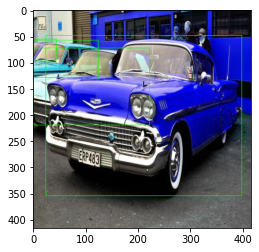

In [90]:
img_file = 'images/558029647efc23fb_jpg.rf.f85cb6586f171ac0ebb13aefd47755b7.jpg'
txt_file = 'labels/558029647efc23fb_jpg.rf.f85cb6586f171ac0ebb13aefd47755b7.txt'
img = cv2.imread(img_file)
H, W = img.shape[:2]

with open(txt_file, 'r') as f:
    lines = [l.strip() for l in f.readlines()]
    for line in lines:
        tokens = line.split(' ')
        x, y, w, h = [float(x) for x in tokens[1:5]]
        x, y, w, h = (np.array([x, y, w, h]) * np.array([W, H, W, H])).astype('int')
        
        x1 = max(int((x - w/2)), 0)
        x2 = min(int((x + w/2)), W)
        y1 = max(int((y - h/2)), 0)
        y2 = min(int((y + h/2)), H)
        
        
        print(x1, x2, y1, y2)
        
        cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 1)
        
plt.imshow(img)